<h1 style='color:blue'>Assignments related to Seaborn using Tips dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load tips data into df
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<h2 style='color:red'>Categorical Plots</h2>

#### Display bar plot for total bill amount for each day

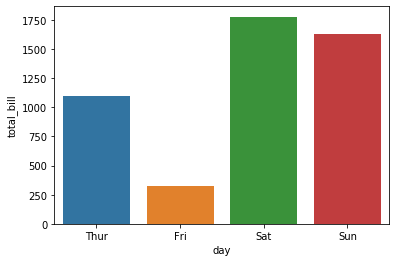

In [4]:
sns.barplot(x="day",y="total_bill",data=df,ci=False,estimator=np.sum)

#### Display two bar plots - one for male another for female - for total_bill amount for each day

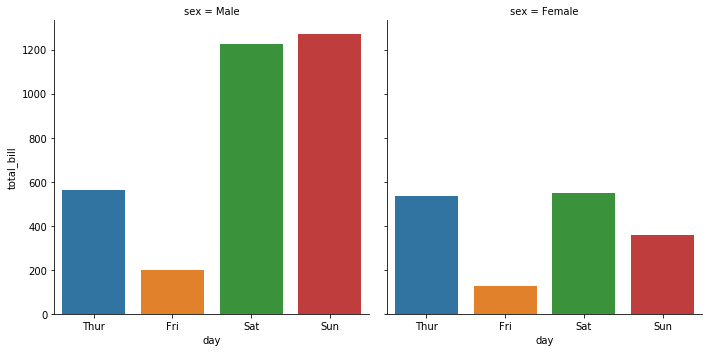

In [10]:
sns.catplot(x="day",y="total_bill",data=df,col="sex",ci=False,kind='bar',estimator=sum)

#### Display a bar plot for number of transactions for each time

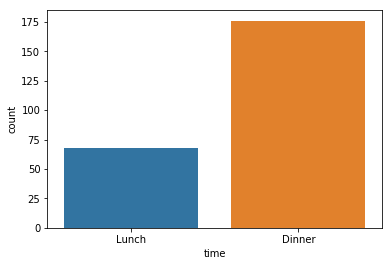

In [16]:
sns.countplot(x="time",data=df)

#### Display a boxplot for distribution of tip amount. Hide outliers.

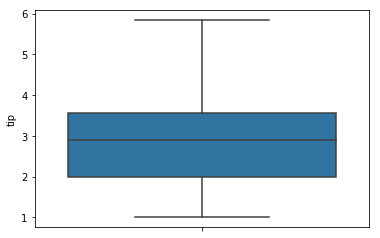

In [20]:
sns.boxplot(x="tip",data=df,showfliers=False,orient='v')

#### Display two boxpots for total_bill - one for smokers and another for non-smokers

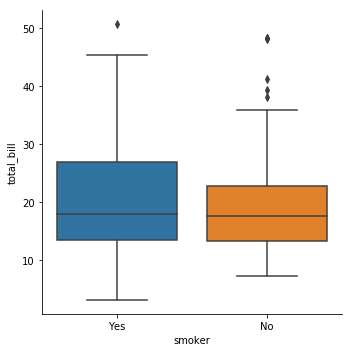

In [98]:
sns.catplot(x="smoker",y='total_bill',data=df,kind='box')

## Distribution Plots

#### Draw scatter plot for tip and total_bill 

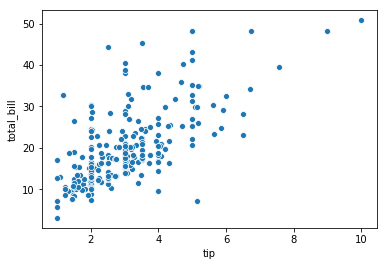

In [37]:
sns.scatterplot(x="tip",y="total_bill",data=df)

#### Draw scatter plot for tip and total_bill with data points separated by sex

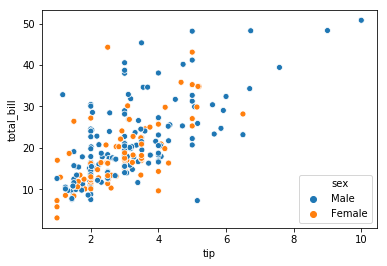

In [38]:
sns.scatterplot(x="tip",y="total_bill",data=df,hue="sex")

#### Draw a pair plot for tip and total_bill 

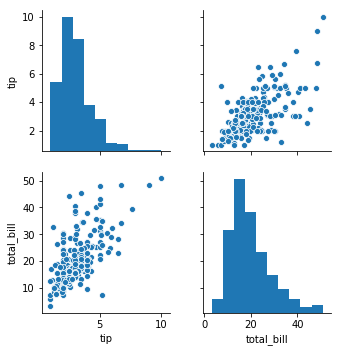

In [45]:
sns.pairplot(df,vars=['tip','total_bill'])

#### Draw a joint plot for total_bill and size

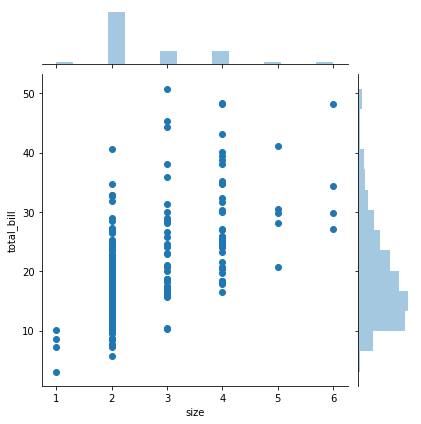

In [42]:
sns.jointplot(x="size",y="total_bill",data=df)

#### Draw two joint plots for total_bill and tip - one for male and another for female

(<seaborn.axisgrid.JointGrid at 0x2321bb383c8>,
 <seaborn.axisgrid.JointGrid at 0x2321be1a588>)

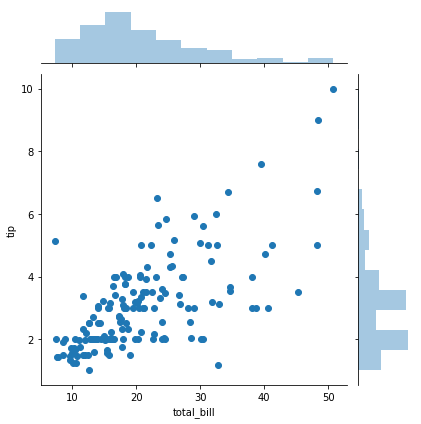

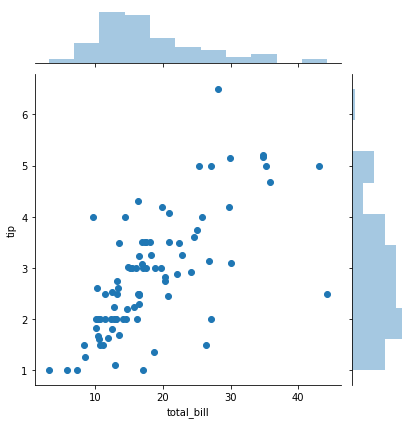

In [54]:
jp_m = df[df['sex'] == 'Male'][['total_bill','tip']]
jp_f = df[df['sex'] == 'Female'][['total_bill','tip']]
sns.jointplot(x='total_bill',y ='tip',data=jp_m), sns.jointplot(x='total_bill',y ='tip',data=jp_f)

## Relational Plots

#### Draw scatter plot showing the relationship between tip and total_bill

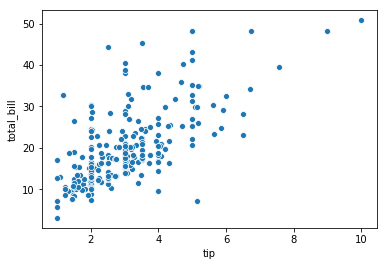

In [55]:
sns.scatterplot(x="tip",y="total_bill",data=df)

#### Draw multiple scatter plots showing relationship between tip and total_bill one for each day

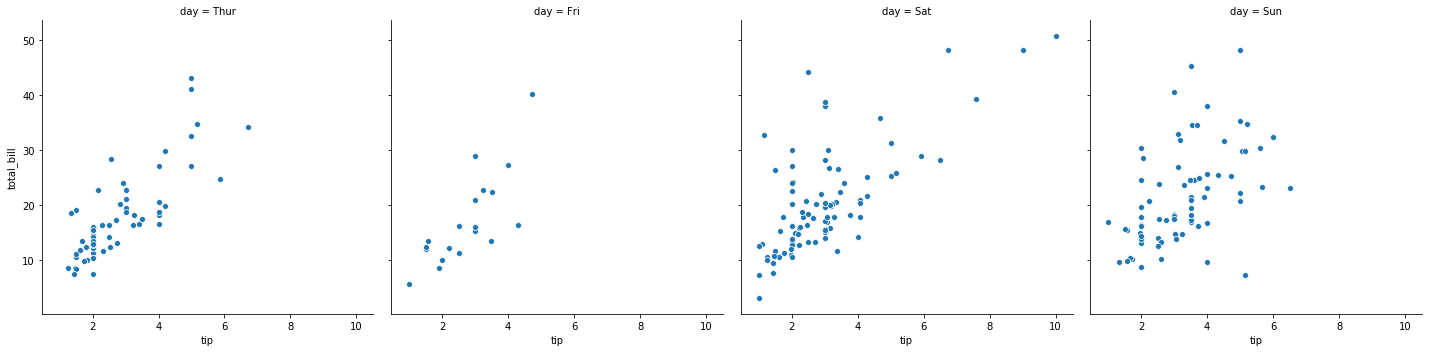

In [58]:
sns.relplot(x="tip",y="total_bill",col="day",data=df)

#### Draw scatter plot showing relationship between size and tip amount percentage to total_bill. Extend it to show different colors for different times.

In [60]:
df['tip_per'] = df['tip'] / df['total_bill'] * 100

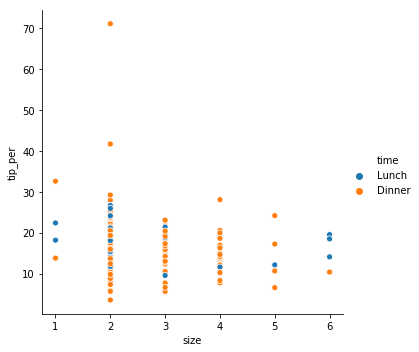

In [61]:
sns.relplot(x="size",y='tip_per',hue="time",data=df)

In [67]:
df.drop(['tip_per'],axis=1,inplace=True)

## Regression Plots 

#### Draw regression plot for tip and total_bill. Draw different lines for male and female. 

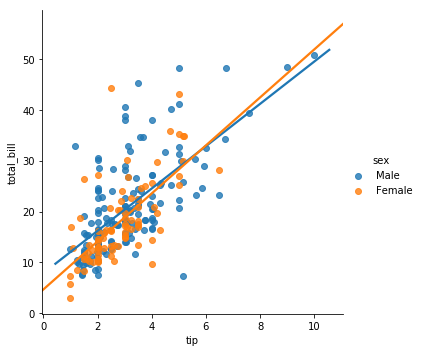

In [63]:
sns.lmplot(x="tip",y='total_bill',hue='sex',data=df,ci=False)

#### Draw different regression plots comparing size and tip amount for each day. Then extend it to show different lines for male and female.

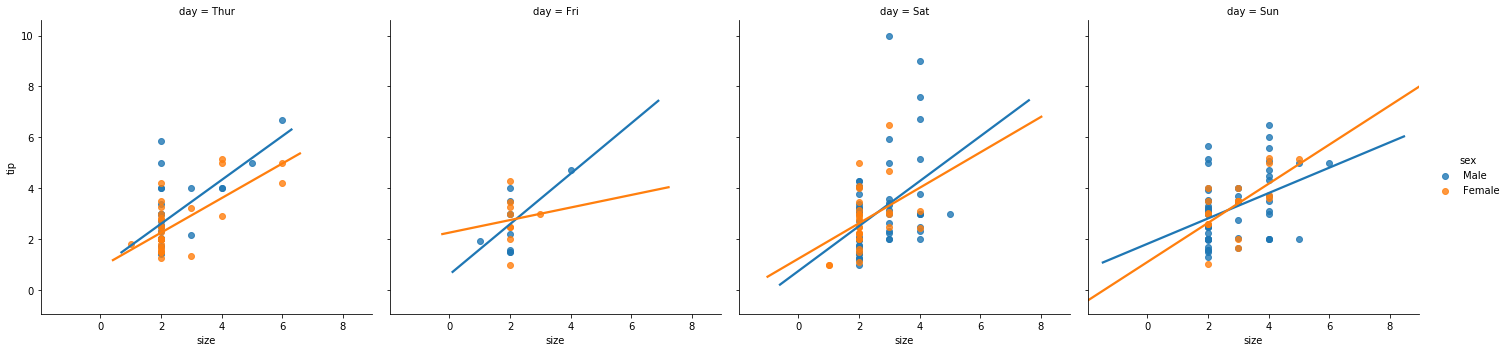

In [64]:
sns.lmplot(x="size",y='tip',col='day',hue='sex',data=df,ci=False)

## Matrix Plots

#### Draw a heatmap to show % of correlation between tip, size and total_bill. Make sure % is displayed as well.

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


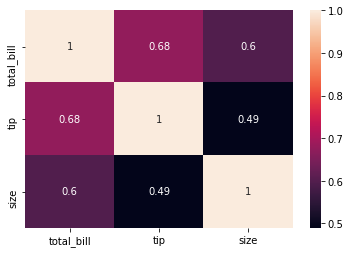

In [77]:
cm = df.corr()
print(cm)
sns.heatmap(cm,annot=True)